In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"
)
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [5]:
df.dropna(inplace=True)  # Remove missing values

In [6]:
le = LabelEncoder()
for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])

In [7]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [9]:
X

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,249,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1
1,1,132,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0
2,2,205,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
4,4,295,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1
5,5,107,1,1,0,1,1,4344,736.0,87.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,272,1,0,0,0,0,3660,5064.0,187.0,360.0,1.0,1
487,487,147,0,0,1,0,0,3812,0.0,112.0,360.0,1.0,0
488,488,67,1,1,1,0,0,14583,0.0,185.0,180.0,1.0,0
489,489,361,1,0,0,0,0,1836,33837.0,90.0,360.0,1.0,2


In [10]:
y

0      1
1      1
2      0
4      1
5      0
      ..
485    1
487    1
488    1
489    0
490    1
Name: Loan_Status, Length: 381, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

C:\Users\vinee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.7662337662337663
Decision Tree Accuracy: 0.6883116883116883


In [16]:
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.56      0.26      0.36        19
           1       0.79      0.93      0.86        58

    accuracy                           0.77        77
   macro avg       0.67      0.60      0.61        77
weighted avg       0.74      0.77      0.73        77


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.40      0.53      0.45        19
           1       0.83      0.74      0.78        58

    accuracy                           0.69        77
   macro avg       0.61      0.63      0.62        77
weighted avg       0.72      0.69      0.70        77



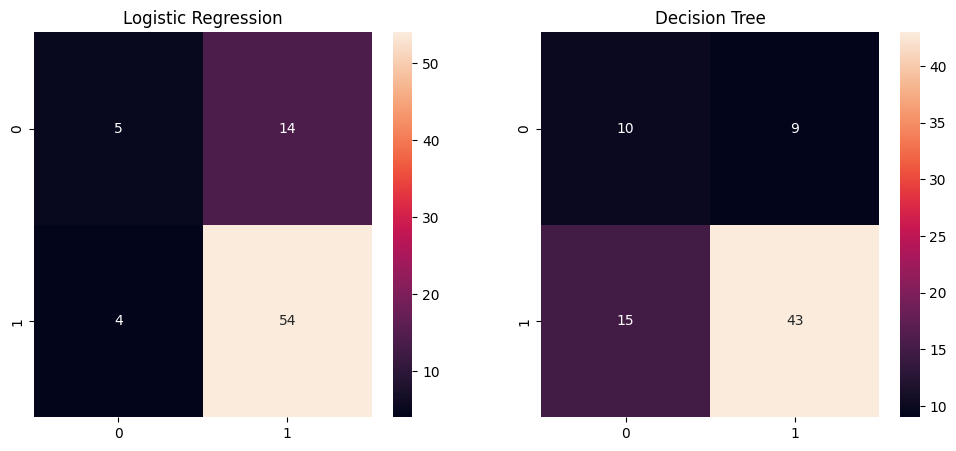

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Decision Tree")
plt.show()
